

<img src="image_from_ios.jpg" style='width:200px; height:200px'/>


<h1 align="center">POPULATION BY COUNTRY</h1>

In [1]:
# Importing General labraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading dataset
df = train = pd.read_excel("population.xlsx")

In [3]:
# Accessing first 5 rows
df.head()

,#,Country (or dependency),Population-2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.0039,5540090,153,9388211,-348399.0,1.7,38,0.61,0.1847
1,2,India,1380004385,0.0099,13586631,464,2973190,-532687.0,2.2,28,0.35,0.1770
2,3,United States,331002651,0.0059,1937734,36,9147420,954806.0,1.8,38,0.83,0.0425
3,4,Indonesia,273523615,0.0107,2898047,151,1811570,-98955.0,2.3,30,0.56,0.0351
4,5,Pakistan,220892340,0.0200,4327022,287,770880,-233379.0,3.6,23,0.35,0.0283


In [5]:
# Accessing statistical information 
df.describe()

,#,Population-2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),World Share
count,235.000000,2.350000e+02,235.000000,2.350000e+02,235.000000,2.350000e+02,201.000000,235.000000
mean,118.000000,3.317120e+07,0.011043,3.461058e+05,478.408511,5.535918e+05,-5.442786,0.004255
std,67.982841,1.351370e+08,0.010757,1.128255e+06,2331.282424,1.687796e+06,123292.057588,0.017337
min,1.000000,8.010000e+02,-0.024700,-3.838400e+05,0.000000,0.000000e+00,-653249.000000,0.000000
25%,59.500000,4.188015e+05,0.003200,4.240000e+02,37.000000,2.545000e+03,-10047.000000,0.000100
50%,118.000000,5.459642e+06,0.009700,3.917000e+04,95.000000,7.724000e+04,-960.000000,0.000700
75%,176.500000,2.057705e+07,0.018500,2.496600e+05,240.000000,4.038200e+05,9741.000000,0.002650
max,235.000000,1.439324e+09,0.038400,1.358663e+07,26337.000000,1.637687e+07,954806.000000,0.184700


From the statistical information  above, the dataframe has 235 entries(counts). The country with the largest population,has populations
of 1,439,323,776. And the country(or dependency) with the lowest population size has a population of 810. 
The mean population is 33,171,200. The minimum and maximum Yearly change are -0.024700 and 0.0384 respectively. The mean Yearly Change is 0.011043.
The minimum and maximum Net Change are -383,840 and 13586630 respectively. The mean Net Change is 346105.8. The maximum Density (P/Km²) is 263370.
The largest land area  has an area of 16376870 Km² and the mean land area is 553591.8 Km². 
The minimum and maximum number of net Migrants are -653,249 and  954,806. The mean and the hightest percentage share of the world population 
are 0.4255% and 18.47% respectively

In [4]:
# Accessing for df information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    int64  
 1   Country (or dependency)  235 non-null    object 
 2   Population-2020          235 non-null    int64  
 3   Yearly Change            235 non-null    float64
 4   Net Change               235 non-null    int64  
 5   Density (P/Km²)          235 non-null    int64  
 6   Land Area (Km²)          235 non-null    int64  
 7   Migrants (net)           201 non-null    float64
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              235 non-null    object 
 11  World Share              235 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 22.2+ KB


The DataFrame has twelve columnns of which eleven contain non-null values and one(Migrants (net)) contains null values. The column 
#is serial number.
Further investigation will be done to access the null value and compute them. The following columns are of object data type instead 
of numeric data type;
Fert. Rate;
Med. Age; and
Urban Pop %.
These columns will be changed to numeric data type upon further investigation.

Also Yearly Change, Urban Pop % and World Share will be multiplied by 100 to get the actual percentage.

In [7]:
df.columns

Index(['#', 'Country (or dependency)', 'Population-2020', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

In [8]:
# Checking for  null values.
df.loc[df.isnull().any(axis=1)]

,#,Country (or dependency),Population-2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
201,202,Isle of Man,85033,0.0053,449,149,570,NaN,N.A.,N.A.,0.53,0.0
202,203,Andorra,77265,0.0016,123,164,470,NaN,N.A.,N.A.,0.88,0.0
203,204,Dominica,71986,0.0025,178,96,750,NaN,N.A.,N.A.,0.74,0.0
204,205,Cayman Islands,65722,0.0119,774,274,240,NaN,N.A.,N.A.,0.97,0.0
205,206,Bermuda,62278,-0.0036,-228,1246,50,NaN,N.A.,N.A.,0.97,0.0
206,207,Marshall Islands,59190,0.0068,399,329,180,NaN,N.A.,N.A.,0.7,0.0
207,208,Northern Mariana Islands,57559,0.0060,343,125,460,NaN,N.A.,N.A.,0.88,0.0
208,209,Greenland,56770,0.0017,98,0,410450,NaN,N.A.,N.A.,0.87,0.0
209,210,American Samoa,55191,-0.0022,-121,276,200,NaN,N.A.,N.A.,0.88,0.0
210,211,Saint Kitts & Nevis,53199,0.0071,376,205,260,NaN,N.A.,N.A.,0.33,0.0


In [9]:
# printing the lenght of null values
len(df.loc[df.isnull().any(axis=1)])

34

The dataframe has 235 rows, of which 34 are null values. "N.A." was recorded for Fert. Rate, Med. Age and Urban Pop % columm. "N.A." is assumed to be NaN. Some countries have NaN for Migrants (net) 
It is assumed there was equilibrium for both columns, thats  migrants net was zero and fertility rate was zero.
Thus the NaN will be imputed with  zero.  

In [5]:
# Replacing null values with zero
df = df.fillna(0)

In [6]:
# Checking for NA values
df.loc[df.isnull().any(axis=1)]

,#,Country (or dependency),Population-2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share


In [7]:
# Replacing "N.A." rows with zeros
df = df.replace("N.A.", 0)

In [7]:
df.tail()

,#,Country (or dependency),Population-2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
230,231,Montserrat,4992,0.0006,3,50,100,0.0,0.0,0,0.10,0.0
231,232,Falkland Islands,3480,0.0305,103,0,12170,0.0,0.0,0,0.66,0.0
232,233,Niue,1626,0.0068,11,6,260,0.0,0.0,0,0.46,0.0
233,234,Tokelau,1357,0.0127,17,136,10,0.0,0.0,0,0.00,0.0
234,235,Holy See,801,0.0025,2,2003,0,0.0,0.0,0,0.00,0.0


In [8]:
# Converting 'Fert. Rate', 'Med. Age', 'Urban Pop %' column to a numeric column

df['Fert. Rate'] =pd.to_numeric(df['Fert. Rate'])
df['Med. Age'] =pd.to_numeric(df['Med. Age'])
df['Urban Pop %'] =pd.to_numeric(df['Urban Pop %'])


In [14]:
# Check df for information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    int64  
 1   Country (or dependency)  235 non-null    object 
 2   Population-2020          235 non-null    int64  
 3   Yearly Change            235 non-null    float64
 4   Net Change               235 non-null    int64  
 5   Density (P/Km²)          235 non-null    int64  
 6   Land Area (Km²)          235 non-null    int64  
 7   Migrants (net)           235 non-null    float64
 8   Fert. Rate               235 non-null    float64
 9   Med. Age                 235 non-null    int64  
 10  Urban Pop %              235 non-null    float64
 11  World Share              235 non-null    float64
dtypes: float64(5), int64(6), object(1)
memory usage: 22.2+ KB


In [9]:
# multiply by 100
percent = ['Yearly Change','Urban Pop %', 'World Share']
df[percent] = df[percent] *100

In [16]:
# Accesssing the first five row
df.head()

,#,Country (or dependency),Population-2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38,61.0,18.47
1,2,India,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28,35.0,17.70
2,3,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38,83.0,4.25
3,4,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30,56.0,3.51
4,5,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23,35.0,2.83


In [17]:
# Accessing statistical information
df.describe()

,#,Population-2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,235.000000,2.350000e+02,235.000000,2.350000e+02,235.000000,2.350000e+02,235.000000,235.000000,235.000000,235.000000,235.000000
mean,118.000000,3.317120e+07,1.104298,3.461058e+05,478.408511,5.535918e+05,-4.655319,2.302553,26.191489,56.157447,0.425489
std,67.982841,1.351370e+08,1.075665,1.128255e+06,2331.282424,1.687796e+06,113983.547578,1.505572,13.697336,27.092369,1.733713
min,1.000000,8.010000e+02,-2.470000,-3.838400e+05,0.000000,0.000000e+00,-653249.000000,0.000000,0.000000,0.000000,0.000000
25%,59.500000,4.188015e+05,0.320000,4.240000e+02,37.000000,2.545000e+03,-8608.000000,1.500000,19.000000,37.500000,0.010000
50%,118.000000,5.459642e+06,0.970000,3.917000e+04,95.000000,7.724000e+04,0.000000,2.000000,28.000000,58.000000,0.070000
75%,176.500000,2.057705e+07,1.850000,2.496600e+05,240.000000,4.038200e+05,4900.000000,3.050000,37.500000,78.500000,0.265000
max,235.000000,1.439324e+09,3.840000,1.358663e+07,26337.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000,18.470000


# Univariate Analysis

In [18]:
### Med. Age Analysis
df["Med. Age"].value_counts()

0     34
19    14
28    12
43    11
32    11
42    10
18    10
20     9
30     8
40     7
22     7
38     7
26     7
34     6
31     6
24     6
17     6
29     5
44     5
33     5
45     5
21     5
41     5
25     4
36     4
37     4
23     4
27     4
46     3
39     3
35     3
47     2
16     1
15     1
48     1
Name: Med. Age, dtype: int64

In [8]:
#Accessing the country with the maximum Med. Age
df[df["Med. Age"] ==df["Med. Age"].max()]

,#,Country (or dependency),Population-2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
10,11,Japan,126476461,-0.003,-383840,347,364555,71560.0,1.4,48,0.92,0.0162


In [9]:
df["Med. Age"].value_counts()

0     34
19    14
28    12
43    11
32    11
42    10
18    10
20     9
30     8
40     7
22     7
38     7
26     7
34     6
31     6
24     6
17     6
29     5
44     5
33     5
45     5
21     5
41     5
25     4
36     4
37     4
23     4
27     4
46     3
39     3
35     3
47     2
16     1
15     1
48     1
Name: Med. Age, dtype: int64

<AxesSubplot:xlabel='Med. Age', ylabel='Count'>

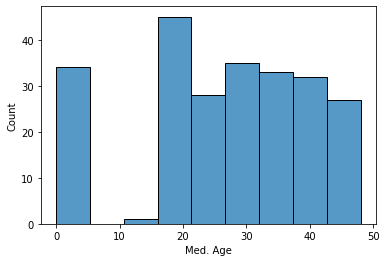

In [35]:
# Plotting histogram of the Med. Age
sns.histplot(df["Med. Age"])


There 34 ages recorded excluding 0 that replaced the "N.A." The age ranges from 15 to 48 year(excluding 0). The minimum and maximum 
age are 15 and 48 respectively.The modal Med. Age is 19 with 14X appearance  follow by 28(12X appearance) and 43 and 32 have the same appearance (11X)
15, 16 and 48 having the lowest appearance of 1

### Land Area (Km²)  Analysis

In [84]:
#Accessing the country with the largest land area 
df[df["Land Area (Km²)"]==df["Land Area (Km²)"].max()]

,#,Country (or dependency),Population-2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
8,9,Russia,145934462,0.04,62206,9,16376870,182456.0,1.8,40,74.0,1.87


In [85]:
#Accessing the country with the smallest land area 
df[df["Land Area (Km²)"]==df["Land Area (Km²)"].min()]

,#,Country (or dependency),Population-2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
234,235,Holy See,801,0.25,2,2003,0,0.0,0.0,0,0.0,0.0


In [39]:
# Assignining df_land to first 10 country with largest Land Area (Km²)
df_land = df.sort_values(by='Land Area (Km²)', ascending=False).head(10)

In [40]:
df_land

,#,Country (or dependency),Population-2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
8,9,Russia,145934462,0.0004,62206,9,16376870,182456.0,1.8,40,0.74,0.0187
0,1,China,1439323776,0.0039,5540090,153,9388211,-348399.0,1.7,38,0.61,0.1847
2,3,United States,331002651,0.0059,1937734,36,9147420,954806.0,1.8,38,0.83,0.0425
38,39,Canada,37742154,0.0089,331107,4,9093510,242032.0,1.5,41,0.81,0.0048
5,6,Brazil,212559417,0.0072,1509890,25,8358140,21200.0,1.7,33,0.88,0.0273
54,55,Australia,25499884,0.0118,296686,3,7682300,158246.0,1.8,38,0.86,0.0033
1,2,India,1380004385,0.0099,13586631,464,2973190,-532687.0,2.2,28,0.35,0.1770
31,32,Argentina,45195774,0.0093,415097,17,2736690,4800.0,2.3,32,0.93,0.0058
63,64,Kazakhstan,18776707,0.0121,225280,7,2699700,-18000.0,2.8,31,0.58,0.0024
32,33,Algeria,43851044,0.0185,797990,18,2381740,-10000.0,3.1,29,0.73,0.0056


## Population-2020 Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

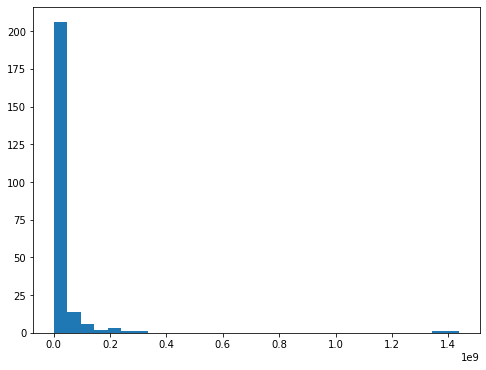

In [19]:
# Plotting the distribution for Population-2020
plt.figure(figsize=(8,6))
plt.hist(df["Population-2020"], bins = 30)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

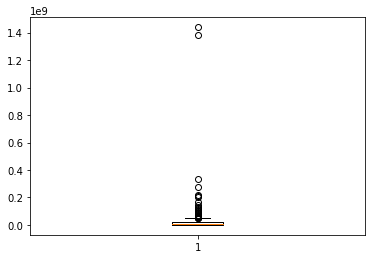

In [46]:
# Plotting the bloxplot to check for outliers of the Population-2020 column 
plt.boxplot(df["Population-2020"])
plt.show

From the histogram and the boxplot above the Population-2020 column is right-skewed with small number of outliers. The outliers we see is as a result of some contries having larger populations than others, especially China and India outnumbered others with 1,439,323,776(18.47%) and 1,380,004,385(17.70%).	
Since the column here is right skewed,  the mean will not be used for analysis because it doesn't give good representative of the 
Population-2020 column.
Further investigation to print the outlier and its length

#### Imputing the outliers

In [49]:

Q1 = df["Population-2020"].quantile(0.25)
Q3 = df["Population-2020"].quantile(0.75)
Q1, Q3

(418801.5, 20577053.0)

In [50]:
IQR = Q3 - Q1
IQR

20158251.5

In [51]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-29818575.75, 50814430.25)

In [53]:
# Accessing the outliers
df[(df["Population-2020"]<lower_limit)|(df["Population-2020"]>upper_limit)]

,#,Country (or dependency),Population-2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38,61.0,18.47
1,2,India,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28,35.0,17.70
2,3,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38,83.0,4.25
3,4,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30,56.0,3.51
4,5,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23,35.0,2.83
5,6,Brazil,212559417,0.72,1509890,25,8358140,21200.0,1.7,33,88.0,2.73
6,7,Nigeria,206139589,2.58,5175990,226,910770,-60000.0,5.4,18,52.0,2.64
7,8,Bangladesh,164689383,1.01,1643222,1265,130170,-369501.0,2.1,28,39.0,2.11
8,9,Russia,145934462,0.04,62206,9,16376870,182456.0,1.8,40,74.0,1.87
9,10,Mexico,128932753,1.06,1357224,66,1943950,-60000.0,2.1,29,84.0,1.65


In [54]:
len(df[(df["Population-2020"]<lower_limit)|(df["Population-2020"]>upper_limit)])

29

We can see that out of 235 Countries (or dependency) 29 (12.34%) countries have populations above our upper limit of 50,814,430. These countries have 
vast number of populations with China having the largest population and others in  descending order in the dataframe. No country was recorded below our lower limit since we can not have negative 
population. The countries with this vast population will be investigated further.

### Yearly Change Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

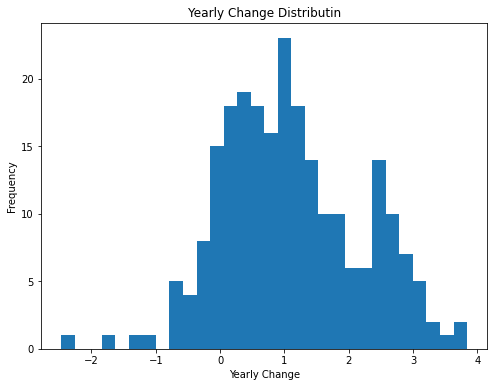

In [21]:
plt.figure(figsize=(8,6))
plt.hist(df["Yearly Change"], bins = 30)
plt.ylabel("Frequency")
plt.xlabel("Yearly Change")
plt.title("Yearly Change Distributin")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

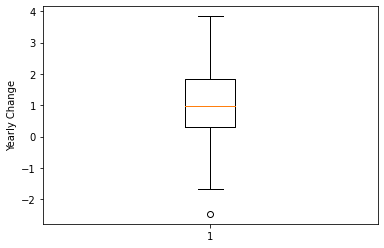

In [22]:
plt.boxplot(df["Yearly Change"])
plt.ylabel("Yearly Change")
plt.show

From the histogram and the boxplot above, Yearly Change column has normal distribution and one point outlier. The mean here can be used to
for analysis. Further investigation to get the country with Yearly Change  outlier

In [33]:
df["Yearly Change"].sort_values(ascending =False)

55     3.84
151    3.68
152    3.47
30     3.32
43     3.27
       ... 
106   -0.74
150   -1.08
141   -1.35
225   -1.69
140   -2.47
Name: Yearly Change, Length: 235, dtype: float64

In [45]:
df[df["Yearly Change"] < -2]

,#,Country (or dependency),Population-2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
140,141,Puerto Rico,2860853,-2.47,-72555,323,8870,-97986.0,1.2,44,0.0,0.04


the highest Yearly Change is 3.84

## Net Change Analyis

<function matplotlib.pyplot.show(close=None, block=None)>

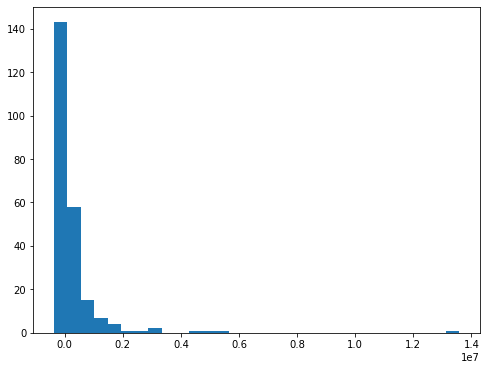

In [58]:
plt.figure(figsize=(8,6))
plt.hist(df["Net Change"], bins = 30)
plt.show

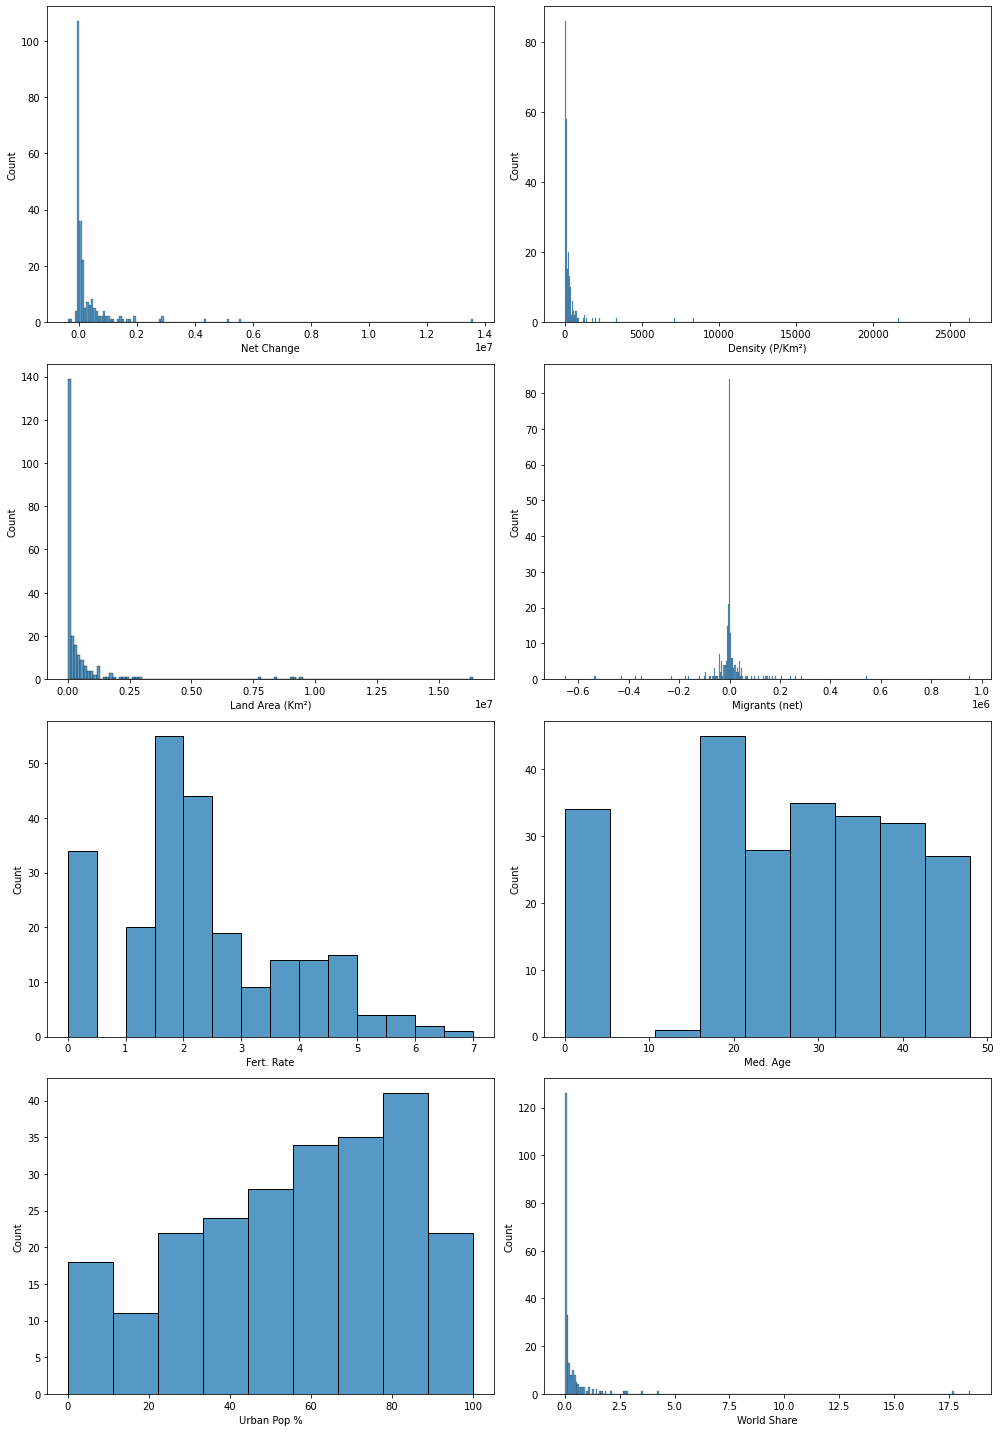

In [62]:
fig =  plt.subplots(figsize = (14,20))
i = 0 
for j, feature in enumerate(df.columns[4:]):
    
    i += 1
    plt.subplot(4,2,i)
    sns.histplot(df[feature])
        
    plt.tight_layout()

### Fert. Rate Analysis

In [31]:
df["Fert. Rate"].sort_values(ascending =False)

55     7.0
72     6.1
15     6.0
59     5.9
71     5.8
      ... 
212    0.0
213    0.0
214    0.0
215    0.0
234    0.0
Name: Fert. Rate, Length: 235, dtype: float64

In [32]:
df[df["Fert. Rate"] >5]

,#,Country (or dependency),Population-2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
6,7,Nigeria,206139589,2.58,5175990,226,910770,-60000.0,5.4,18,52.0,2.64
15,16,DR Congo,89561403,3.19,2770836,40,2267050,23861.0,6.0,17,46.0,1.15
43,44,Angola,32866272,3.27,1040977,26,1246700,6413.0,5.6,17,67.0,0.42
55,56,Niger,24206644,3.84,895929,19,1266700,4000.0,7.0,15,17.0,0.31
58,59,Burkina Faso,20903273,2.86,581895,76,273600,-25000.0,5.2,18,31.0,0.27
59,60,Mali,20250833,3.02,592802,17,1220190,-40000.0,5.9,16,44.0,0.26
71,72,Chad,16425864,3.00,478988,13,1259200,2000.0,5.8,17,23.0,0.21
72,73,Somalia,15893222,2.92,450317,25,627340,-40000.0,6.1,17,47.0,0.20
77,78,Burundi,11890784,3.12,360204,463,25680,2001.0,5.5,17,14.0,0.15
143,144,Gambia,2416668,2.94,68962,239,10120,-3087.0,5.3,18,59.0,0.03


Niger has the hightest Fert. Rate of 7.0 with Med. Age of 15 and Yearly Change of about 3.84. The youngest age of Niger is factor 
for hight fertility rate and highest Yearly Change.

## Migrants (net) Analysis

In [17]:
# Summing up the 'Migrants (net)
df['Migrants (net)'].sum()


-1094.0

The  Migrants (net) for that dataframe is - 1094. This means that the number of emigrants exceeds the number of immigrants. 

# Multivariate Analysis

<AxesSubplot:>

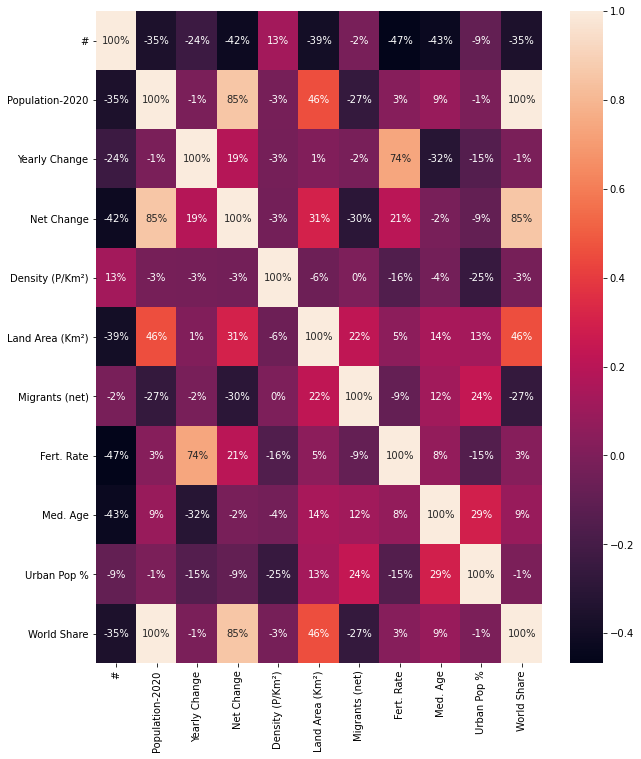

In [75]:
# Plotting correlation matrix for the df
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(),annot=True,fmt=".0%")

we can see that there is positive strong correlation of 85% between the Population and Net Change column. and 74% between Yearly Change and 
Fert. Rate. Will investigate further.

Text(0.5, 1.0, 'Med. Age vs Fert. Rate')

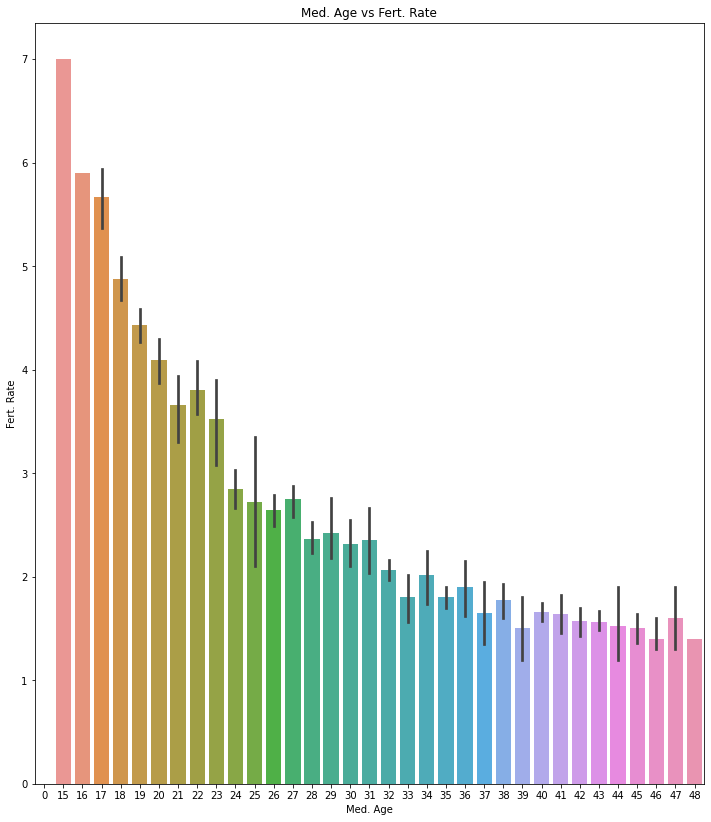

In [13]:
# Plot   Med. Age vs Fert. Rate
plt.figure(figsize = (12,14))
sns.barplot(df["Med. Age"], df["Fert. Rate"])
plt.title("Med. Age vs Fert. Rate")

From the diagram above, Med. Age has negative correlation with the Fert Rate. The lowest the Med. Age for a country the highest the 
Fert. Rate. Niger has the lowest Med. Age of 15 so thus highest fertility rate of 7. Therefore the young populations of a country has higher fertility
rate than the older population.

<function matplotlib.pyplot.show(close=None, block=None)>

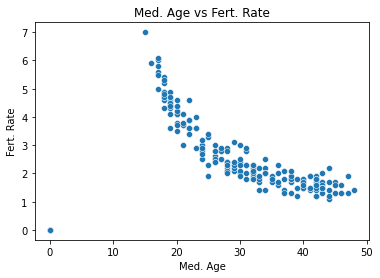

In [15]:

#Plot   Med. Age vs Fert. Rate
sns.scatterplot(df["Med. Age"], df["Fert. Rate"])
plt.title("Med. Age vs Fert. Rate")
plt.show

Text(0.5, 1.0, 'Med. Age vs Yearly Change')

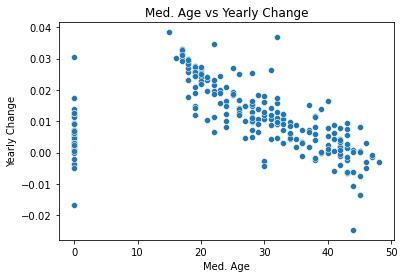

In [20]:
#Plot   Med. Age vs Yearly Change
sns.scatterplot(df["Med. Age"], df["Yearly Change"])
plt.title("Med. Age vs Yearly Change")

There is also a negative correlation between Med. Age and Yearly Change. The lowest the Med Age. of a country the highest the Yearly Change and vice versa
This is as result of the negative correlation between fert rate and Med. Age of a country. Though Japan has the highest Med. Age with -0.3 yearly change, Puerto Rico has the lowest yearly change with Med Age OF 44.

Text(0.5, 1.0, 'Med. Age vs Yearly Change')

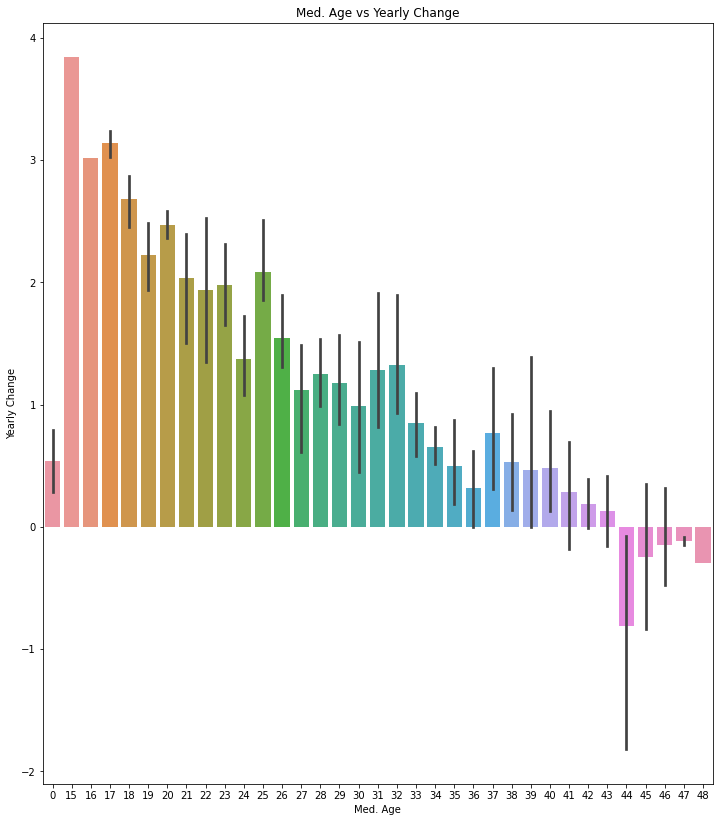

In [16]:
#Plot   Med. Age vs Yearly Change
plt.figure(figsize = (12,14))
sns.barplot(df["Med. Age"], df["Yearly Change"])
plt.title("Med. Age vs Yearly Change")

Text(0.5, 1.0, 'Fert Rate vs Yearly Change')

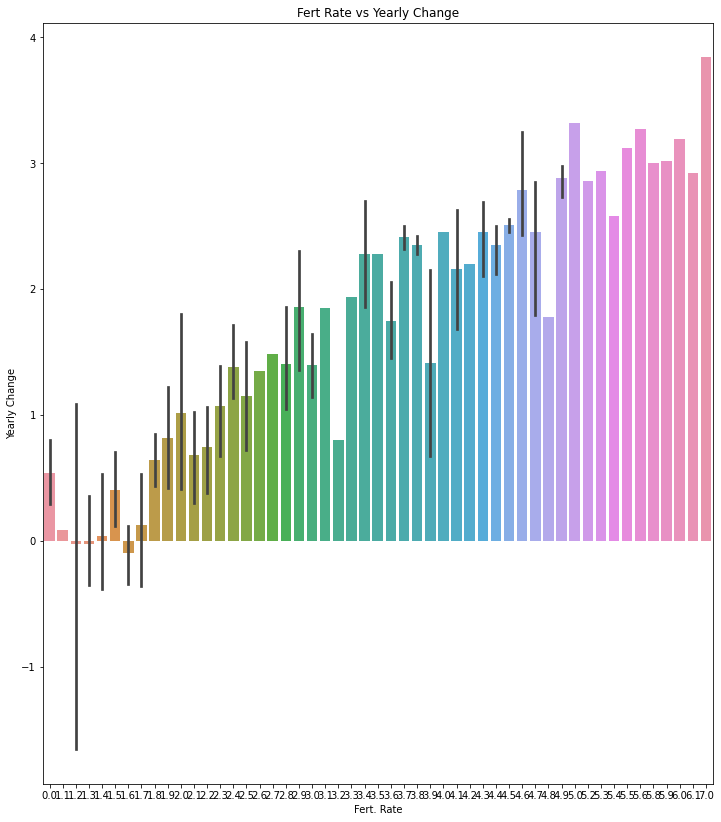

In [17]:
#Plot   Fert Rate vs Yearly Change
plt.figure(figsize = (12,14))
sns.barplot(df['Fert. Rate'], df["Yearly Change"])
plt.title("Fert Rate vs Yearly Change")

there is strong positive correlation between Fert Rate vs Yearly Change in the above diagram. Niger has the hightest Fert. Rate of 7.0 with Med. Age of 15 and Yearly Change of about 3.84. The youngest age of Niger is factor 
for hight fertility rate and highest Yearly Change.

Text(0.5, 1.0, 'Med. Age vs Urban Pop %')

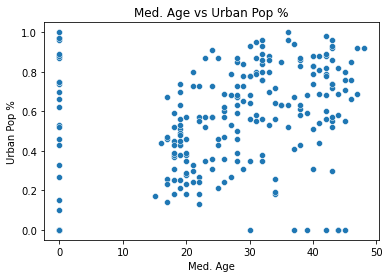

In [23]:
# plot of Med. Age vs Urban Pop %
sns.scatterplot(df["Med. Age"], df["Urban Pop %"])
plt.title("Med. Age vs Urban Pop %")

Text(0.5, 1.0, 'Med. Age vs Yearly Change')

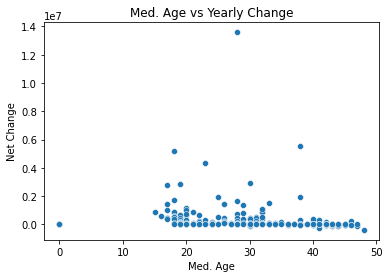

In [24]:
sns.scatterplot(df["Med. Age"], df["Net Change"])
plt.title("Med. Age vs Yearly Change")

<function matplotlib.pyplot.show(close=None, block=None)>

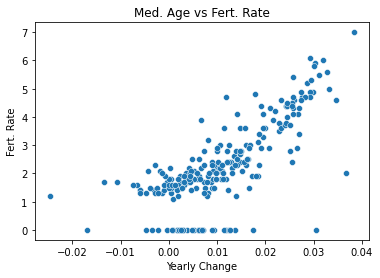

In [25]:
sns.scatterplot(df["Yearly Change"], df["Fert. Rate"])
plt.title("Med. Age vs Fert. Rate")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

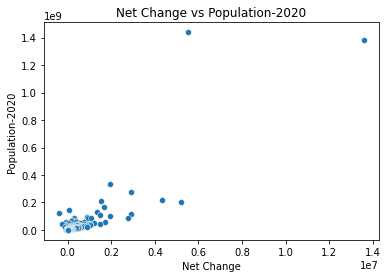

In [26]:
sns.scatterplot(df['Net Change'], df["Population-2020"])
plt.title("Net Change vs Population-2020")
plt.show

there is positive correlation between Net Change vs Population-2020"

<function matplotlib.pyplot.show(close=None, block=None)>

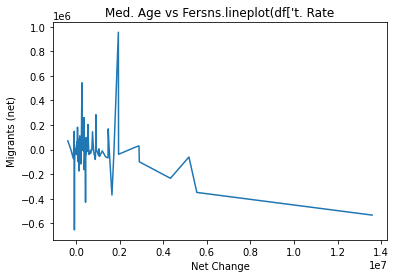

In [27]:
sns.lineplot(df['Net Change'],df['Migrants (net)'])
plt.title("Med. Age vs Fersns.lineplot(df['t. Rate")
plt.show

we can see from the diagram above that there is also a negative correlation between net change and migrants (net)

In [19]:
# Assigning df1 to the first ten highest country.
df1 = df.head(10)

In [52]:
df1

,#,Country (or dependency),Population-2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38,61.0,18.47
1,2,India,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28,35.0,17.70
2,3,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38,83.0,4.25
3,4,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30,56.0,3.51
4,5,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23,35.0,2.83
5,6,Brazil,212559417,0.72,1509890,25,8358140,21200.0,1.7,33,88.0,2.73
6,7,Nigeria,206139589,2.58,5175990,226,910770,-60000.0,5.4,18,52.0,2.64
7,8,Bangladesh,164689383,1.01,1643222,1265,130170,-369501.0,2.1,28,39.0,2.11
8,9,Russia,145934462,0.04,62206,9,16376870,182456.0,1.8,40,74.0,1.87
9,10,Mexico,128932753,1.06,1357224,66,1943950,-60000.0,2.1,29,84.0,1.65


In [81]:
# Assigning df2 to the last  ten  countries.
df2 = df.tail(10)
df2

,#,Country (or dependency),Population-2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
225,226,Wallis & Futuna,11239,-1.69,-193,80,140,0.0,0.0,0,0.0,0.0
226,227,Nauru,10824,0.63,68,541,20,0.0,0.0,0,0.0,0.0
227,228,Saint Barthelemy,9877,0.30,30,470,21,0.0,0.0,0,0.0,0.0
228,229,Saint Helena,6077,0.30,18,16,390,0.0,0.0,0,27.0,0.0
229,230,Saint Pierre & Miquelon,5794,-0.48,-28,25,230,0.0,0.0,0,100.0,0.0
230,231,Montserrat,4992,0.06,3,50,100,0.0,0.0,0,10.0,0.0
231,232,Falkland Islands,3480,3.05,103,0,12170,0.0,0.0,0,66.0,0.0
232,233,Niue,1626,0.68,11,6,260,0.0,0.0,0,46.0,0.0
233,234,Tokelau,1357,1.27,17,136,10,0.0,0.0,0,0.0,0.0
234,235,Holy See,801,0.25,2,2003,0,0.0,0.0,0,0.0,0.0


Text(0.5, 1.0, 'Top 10 Largest country By Population-2020 ')

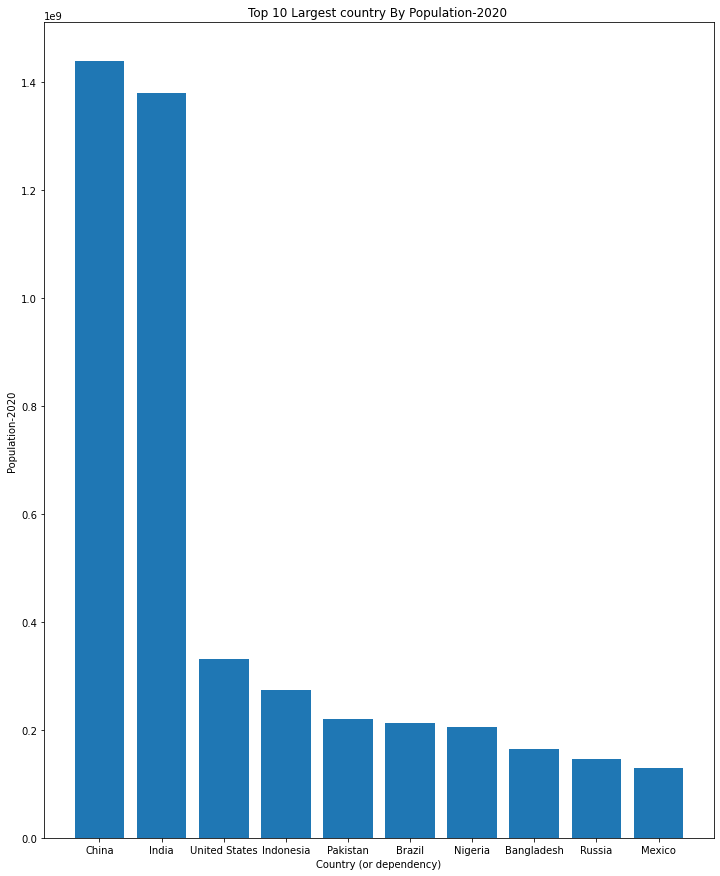

In [20]:
plt.figure(figsize = (12,15))
plt.bar(df1["Country (or dependency)"], df1["Population-2020"])
plt.xlabel("Country (or dependency)")
plt.ylabel("Population-2020")
plt.title("Top 10 Largest country By Population-2020 ")


<function matplotlib.pyplot.show(close=None, block=None)>

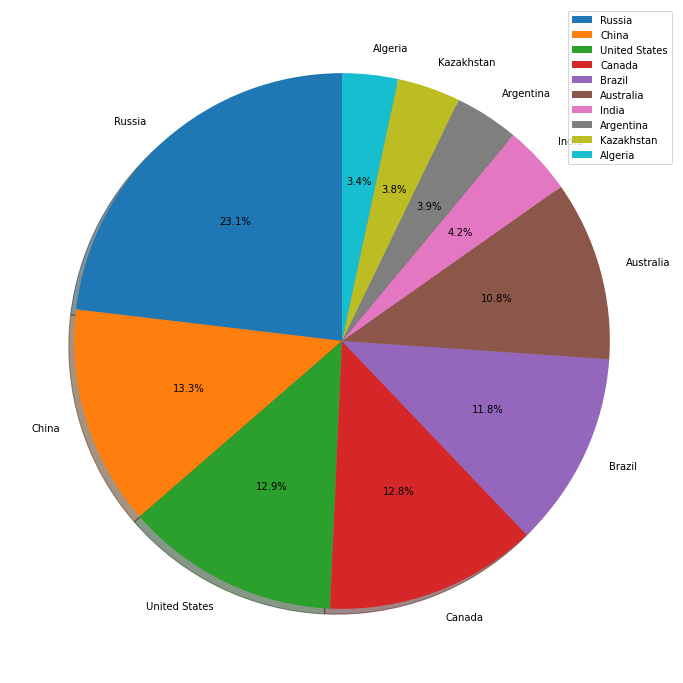

In [43]:
# Plot of first 10 country with largest Land Area (Km²)
plt.figure(figsize = (12,14))
plt.pie( df_land["Land Area (Km²)"], labels =df_land["Country (or dependency)"], shadow = True,startangle=90, autopct='%1.1f%%')
plt.legend()
plt.show

with the top ten populations, we can see from the diagram that Russia has the largest land area

<function matplotlib.pyplot.show(close=None, block=None)>

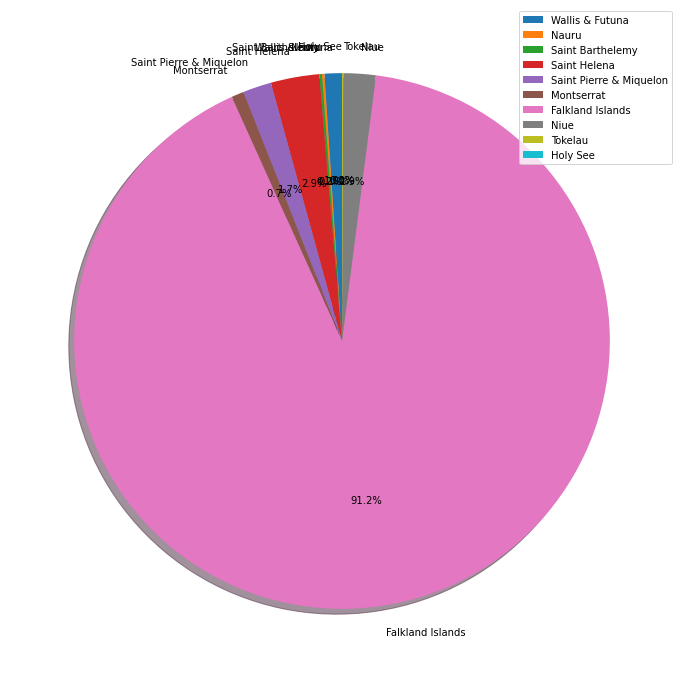

In [82]:
# PLOT OF last  10 COUNRTY(POPULATION SIZE) VS LAND AREA
plt.figure(figsize = (12,14))
plt.pie( df2["Land Area (Km²)"], labels =df2["Country (or dependency)"], shadow = True,startangle=90, autopct='%1.1f%%')
plt.legend()
plt.show

with the last  ten countries in term of population 2020,Falkland Islands has the largest land area.